# K-means Clustering
Notes:  
- The TIME column contains the time in seconds.  
  - 31536000 seconds = 1 year  
- ELEM_X and ELEM_Y are equivalent

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv("../data_files/cleaned_mesh_react.txt", delimiter=',', index_col=['TIME', 'INDEX'])
print('Shape: ', data.shape, '\n\nColumns: ', data.columns)

# Clean negative values
print(np.any(data < 0))
data[data<0] = 0.000001
print(np.any(data < 0))

Shape:  (75642, 57) 

Columns:  Index(['ELEM_x', 'P (Pa)', 'T (deg C)', 'SG', 'SS', 'XNaCl', 'YH2OG', 'XCO2aq',
       'PCAP (Pa)', 'k-red', 'DG (kg/m^3)', 'DL (kg/m^3)', 'PER MOD', 'X2',
       'X3', 'DX1', 'DX2', 'DX3', 'DX4', 'K(gas)', 'K(liq)', 'VIS(gas)',
       'VIS(liq)', 'ELEM_y', 'Sg', 'Sl', 'T', 'pH', 'alo2-', 'ca+2', 'cl-',
       'fe+2', 'h+', 'h2o', 'hco3-', 'k+', 'mg+2', 'na+', 'o2(aq)', 'sio2(aq)',
       'so4-2', 'SMco2', 'Porosity', 'Permeabi.', 'calcite', 'quartz',
       'chlorite', 'illite', 'albite', 'siderite-2', 'ankerite', 'kaolinite',
       'magnesite', 'dolomite', 'smectite-na', 'co2(g)', 'fugcoe_co2(g)'],
      dtype='object')
True
False


## K-means with data set to 2 dimensions

In [3]:
inertias = []
ks = range(1,20)
for k in ks :
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    inertias.append(kmeans.inertia_)

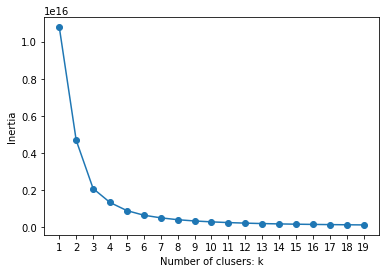

In [4]:
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusers: k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

From the graph, it seems that 4 or 5 clusters would be the best.

In [7]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)
# Display labels
print(kmeans.labels_)
# Display Centroids
print(kmeans.cluster_centers_)

[2 2 2 ... 3 3 3]
[[ 2.90657697e+04  1.54182046e+07  7.49818928e+01  1.69250660e-03
   0.00000000e+00  3.82194751e-03  4.11284830e-03  4.40560621e-02
   2.34317467e-09  1.00000000e+00  4.12705146e+02  9.93346432e+02
   0.00000000e+00  3.99825333e-03  8.55127593e+00  2.88922751e+02
   9.54216273e-07  2.86941950e-06  1.88706025e-05  5.11623855e-05
   9.98056741e-01  1.45642434e-01  3.85007297e-04  2.90657697e+04
   1.69250660e-03  9.98307485e-01  7.49818928e+01  5.28698558e+00
   1.44019910e-08  1.65626878e-02  9.28578296e-04  3.27266093e-04
   8.90398956e-01  5.49901707e+01  9.42548541e-01  7.86892835e-06
   6.21881670e-05  1.92144607e-02  5.58823659e-05  5.32362416e-03
   2.41111870e-06  4.26636376e-03  1.49688561e-01  8.47973129e-14
   1.92314859e-06  2.71714078e-05  2.57241406e-06  8.03508122e-07
   9.39947781e-07  1.66920941e-06  5.36752470e-05  5.75827775e-05
   0.00000000e+00  0.00000000e+00  5.18003474e-07  1.20480049e+02
   6.60194872e-01]
 [ 2.91994295e+04  1.65380106e+07  7.46